<a href="https://colab.research.google.com/github/tobias-fyi/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# Imports
import pandas as pd

In [3]:
# Load the dataset via URL
persons_url = "https://raw.githubusercontent.com/tobias-fyi/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"
persons_df = pd.read_csv(persons_url)

# Overview / preview of the dataset
print(persons_df.shape)
persons_df.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


## Hypothesis

My initial hypothesis is that both age and exercise_time have an

In [4]:
# Taking a look at the types
# Though it is somewhat obvious all the columns are integers
print(persons_df.dtypes)

Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object


In [0]:
# Time for some crosstabulation
pd.crosstab(persons_df["weight"], persons_df["age"])

In [0]:
# Not very useful of a table
# I'm going to try grouping the records into bins
# I'll create bins for each variable, first with 4
age_bins = pd.cut(persons_df["age"], 4)
wgt_bins = pd.cut(persons_df["weight"], 4)
exe_bins = pd.cut(persons_df["exercise_time"], 4)


In [15]:
# Weight x Age
pd.crosstab(wgt_bins, age_bins, normalize="columns")
# Although not a strong or obvious relationship,
# it seems that in general older individuals are more likely to weigh more

age,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
weight,,,,
"(99.854, 136.5]",0.389408,0.442623,0.391304,0.288591
"(136.5, 173.0]",0.383178,0.304918,0.307971,0.322148
"(173.0, 209.5]",0.161994,0.196721,0.228261,0.261745
"(209.5, 246.0]",0.065421,0.055738,0.072464,0.127517


In [22]:
# Weight x Exercise Time
pd.crosstab(wgt_bins, exe_bins, normalize="columns")
# This seems to be an obvious relationship
# The more time spent exercising, the more likely an individual will weight less

exercise_time,"(-0.3, 75.0]","(75.0, 150.0]","(150.0, 225.0]","(225.0, 300.0]"
weight,,,,
"(99.854, 136.5]",0.230986,0.290698,0.459770,0.633333
"(136.5, 173.0]",0.250704,0.337209,0.398467,0.366667
"(173.0, 209.5]",0.301408,0.316860,0.141762,0.000000
"(209.5, 246.0]",0.216901,0.055233,0.000000,0.000000


In [33]:
# Exercise Time x Age
pd.crosstab(exe_bins, age_bins, normalize="columns")
# Aside from the oldest age group, the exercise times of individuals within the age groups are basically equal

age,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
exercise_time,,,,
"(-0.3, 75.0]",0.242991,0.229508,0.250000,0.463087
"(75.0, 150.0]",0.227414,0.252459,0.264493,0.406040
"(150.0, 225.0]",0.277259,0.232787,0.231884,0.124161
"(225.0, 300.0]",0.252336,0.285246,0.253623,0.006711


In [24]:
# Crosstab of all three variables
pd.crosstab(wgt_bins, [exe_bins, age_bins], normalize="columns")

exercise_time     (-0.3, 75.0]      ...       (225.0, 300.0]
age             (17.938, 33.5]      ...         (64.5, 80.0]
weight                              ...                     
(99.854, 136.5]       0.230769      ...                  1.0
(136.5, 173.0]        0.230769      ...                  0.0
(173.0, 209.5]        0.307692      ...                  0.0
(209.5, 246.0]        0.230769      ...                  0.0

[4 rows x 16 columns]

In [20]:
# Going to try with even fewer bins for weight
wgt_bins_2 = pd.cut(persons_df["weight"], 2)
pd.crosstab(wgt_bins_2, [exe_bins, age_bins], normalize="columns")

exercise_time     (-0.3, 75.0]      ...       (225.0, 300.0]
age             (17.938, 33.5]      ...         (64.5, 80.0]
weight                              ...                     
(99.854, 173.0]       0.461538      ...                  1.0
(173.0, 246.0]        0.538462      ...                  0.0

[2 rows x 16 columns]

In [21]:
# Going to try with even fewer bins for weight AND age
age_bins_2 = pd.cut(persons_df["age"], 2)
pd.crosstab(wgt_bins_2, [exe_bins, age_bins_2], normalize="columns")

exercise_time     (-0.3, 75.0]      ...       (225.0, 300.0]
age             (17.938, 49.0]      ...         (49.0, 80.0]
weight                              ...                     
(99.854, 173.0]       0.466216      ...                  1.0
(173.0, 246.0]        0.533784      ...                  0.0

[2 rows x 8 columns]

In [39]:
# This time, swapping the exercise and age bins
crosstab_1 = pd.crosstab(wgt_bins_2, [age_bins_2, exe_bins], normalize="columns")
crosstab_1
# The relationship between exercise time and weight is more apparent
# Within the age bins, as exercise time increases the probability of being overweight decreases

age             (17.938, 49.0]      ...         (49.0, 80.0]
exercise_time     (-0.3, 75.0]      ...       (225.0, 300.0]
weight                              ...                     
(99.854, 173.0]       0.466216      ...                  1.0
(173.0, 246.0]        0.533784      ...                  0.0

[2 rows x 8 columns]

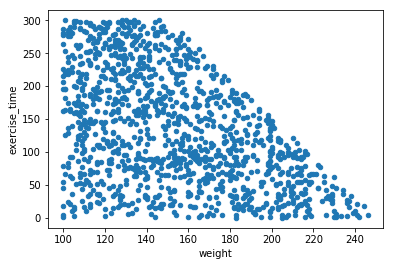

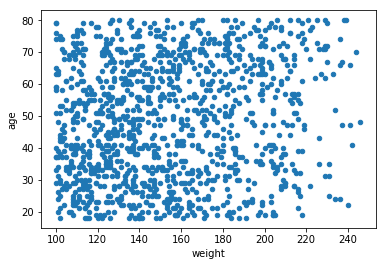

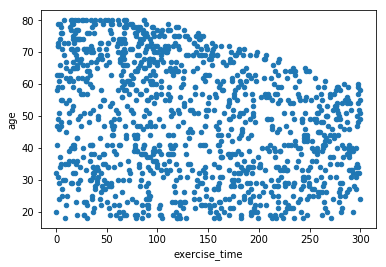

In [36]:
# Time to look at some plots - first up, scatter
persons_df.plot.scatter("weight", "exercise_time")
persons_df.plot.scatter("weight", "age")
persons_df.plot.scatter("exercise_time", "age")

In [64]:
# The plots above don't do a whole lot of good
# Trying something else, such as a line plot
# Also going to remove the older age group and use 4 bins for weight, 2 for exercise time
exe_bins_2 = pd.cut(persons_df["exercise_time"], 2)
crosstab_2 = pd.crosstab(wgt_bins, [age_bins_2, exe_bins_2], normalize="columns")
ct_final = crosstab_2.iloc[:, :2]
ct_final

age             (17.938, 49.0]               
exercise_time    (-0.3, 150.0] (150.0, 300.0]
weight                                       
(99.854, 136.5]       0.268456       0.548780
(136.5, 173.0]        0.291946       0.393293
(173.0, 209.5]        0.312081       0.057927
(209.5, 246.0]        0.127517       0.000000

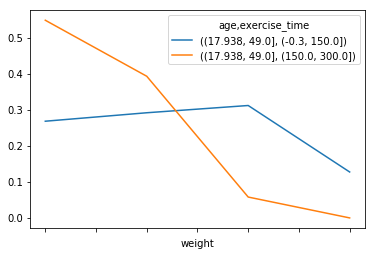

In [65]:
ct_final.plot();
# This is one of the more intuitive ones that doesn't get too crowded.

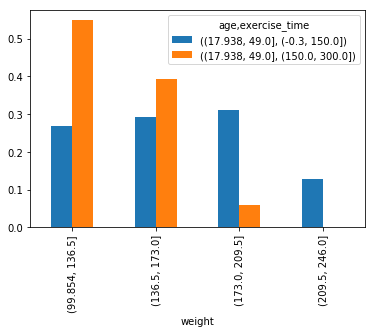

In [66]:
# Maybe the same data would look better as a different type of plot
ct_final.plot(kind="bar");

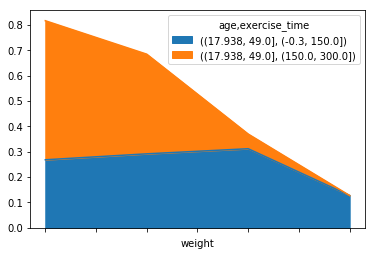

In [69]:
ct_final.plot.area();

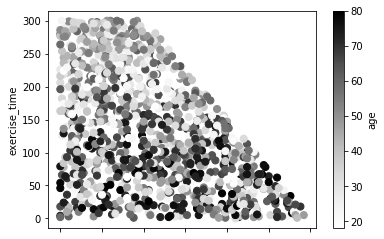

In [73]:
persons_df.plot.scatter(x="weight", y="exercise_time", c="age", s=50);

In [0]:
import numpy as np

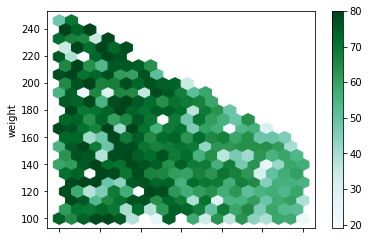

In [80]:
persons_df.plot.hexbin(x="exercise_time", y="weight", C="age", reduce_C_function=np.max, gridsize=20);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?

---

1. The variables are all integers.
2. It seems to be the case that older individuals are more likely to weigh more, and that those who spend more time exercising are more likely to weigh less.
3. My intuition says that the relationship between age and weight is spurious. Apart from the increase in weight when a person goes through puberty, there is no real reason to believe that age dictates weight. On the other hand, the most obvious and "real" relationship is between exercise time and weight. This relationship becaomes even more apparent when the age is binned - within the age bins, the relationship between exercise time and weight is very consistently negative.



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

## Spurious Correlations

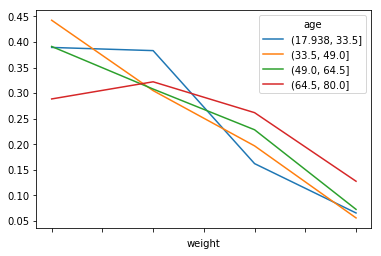

In [102]:
# I would like to plot a line showing age and weight
# But plotting the data directly would be too crowded
# Maybe plot the crosstab
ct_wgt_age = pd.crosstab(wgt_bins, age_bins, normalize="columns")
ct_wgt_age.plot();

In [85]:
# The type of the bins will determine what kinds of plots are really possible?
print(type(wgt_bins))

<class 'pandas.core.series.Series'>


In [0]:
# Trying it out with pyplot
import matplotlib.pyplot as plt

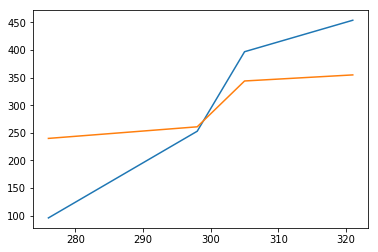

In [103]:
# One good way of visualizing this correlation would be to plot the frequencies / counts of each bin
# The one thing I'm unsure about is what to use as the x-axis
plt.plot(age_bins.value_counts(), wgt_bins.value_counts())
plt.plot(age_bins.value_counts(), exe_bins.value_counts())
plt.show()